In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('titanic_train.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

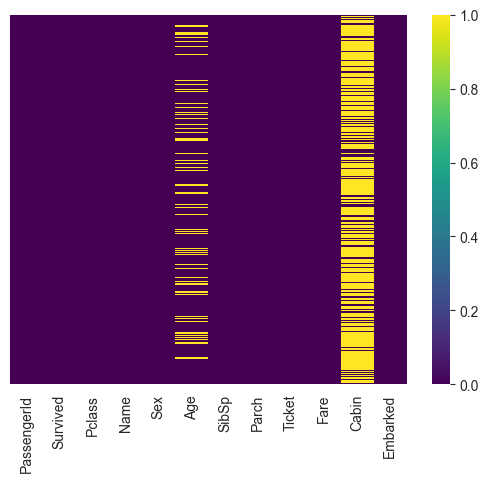

In [41]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

C:\Users\joshi\AppData\Local\Temp\ipykernel_17844\3520224984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='PiYG')


<Axes: xlabel='Survived', ylabel='count'>

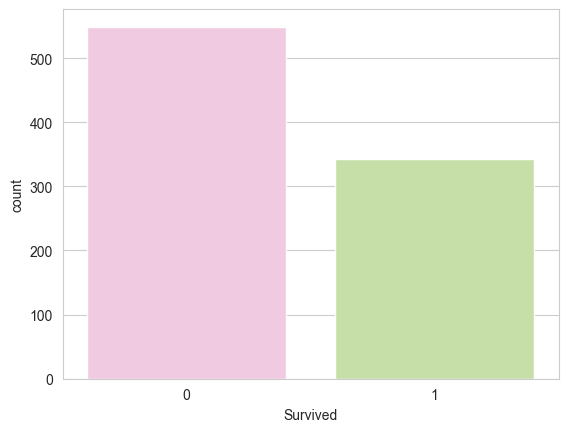

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='PiYG')

<Axes: xlabel='Survived', ylabel='count'>

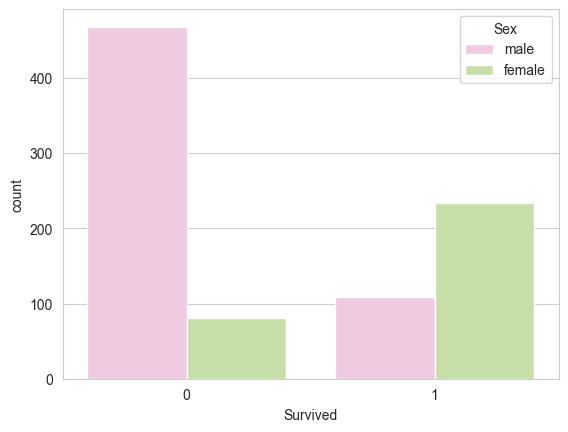

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Sex",data=train,palette='PiYG')

<Axes: xlabel='Survived', ylabel='count'>

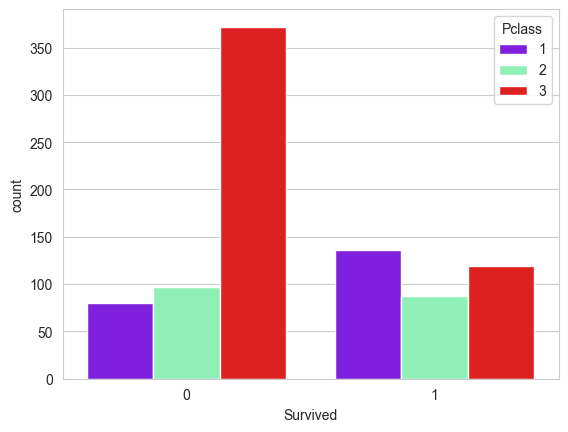

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Pclass",data=train,palette='rainbow')

C:\Users\joshi\AppData\Local\Temp\ipykernel_17844\2541588105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=30)


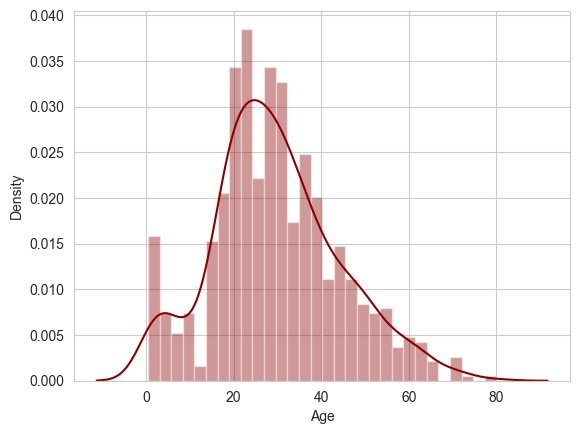

In [45]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=30)
plt.gca().grid(True)

<Axes: >

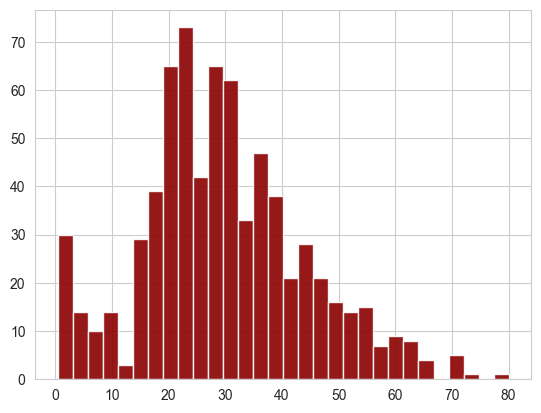

In [46]:
train["Age"].hist(bins=30,color="darkred",alpha=0.9)

C:\Users\joshi\AppData\Local\Temp\ipykernel_17844\1323842061.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SibSp",data=train,palette="rainbow")


<Axes: xlabel='SibSp', ylabel='count'>

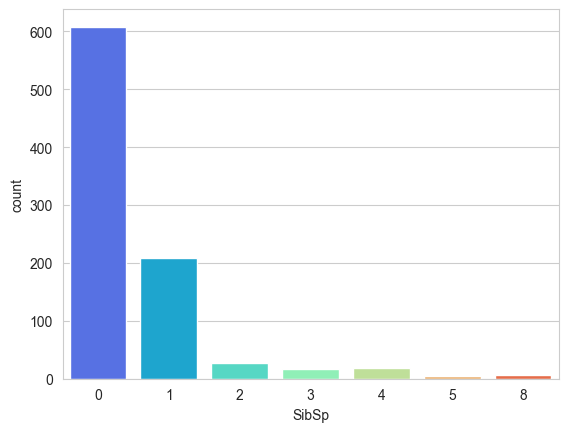

In [47]:
sns.countplot(x="SibSp",data=train,palette="rainbow")

<Axes: >

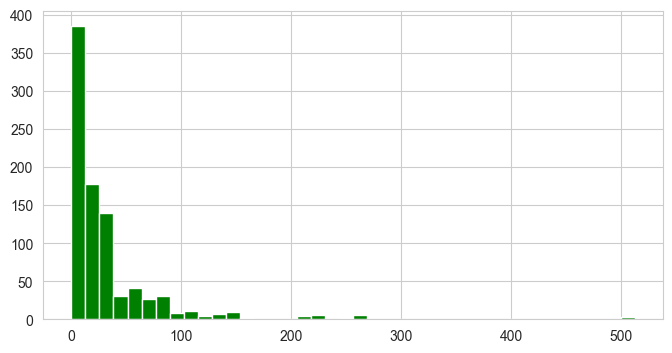

In [48]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


C:\Users\joshi\AppData\Local\Temp\ipykernel_17844\1683851715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

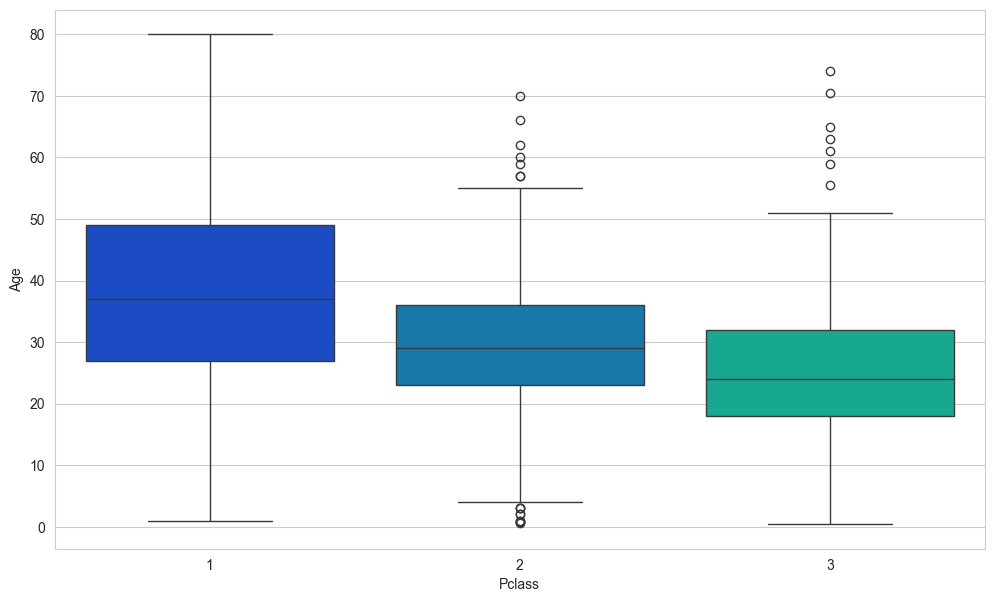

In [49]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [50]:
def impute_age(cols):
    Age = cols [0]
    Pclass = cols [1]

    if pd.isnull(Age):

      if Pclass ==1:
        return 37
      elif Pclass ==2:
        return 29
      else:
        return 24
    else:
     return Age

In [51]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


C:\Users\joshi\AppData\Local\Temp\ipykernel_17844\3080165839.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols [0]
C:\Users\joshi\AppData\Local\Temp\ipykernel_17844\3080165839.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols [1]


<Axes: >

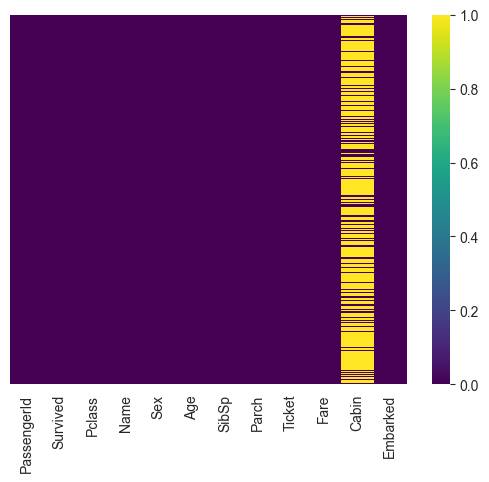

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [53]:
train.drop("Cabin",axis=1,inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [56]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [57]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
train = pd.concat([train,sex,embark],axis=1)

In [59]:
train.drop("male",axis=1,inplace=True)

In [60]:
train.drop("Q",axis=1,inplace=True)

In [61]:
train.drop("S",axis=1,inplace=True)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare
520          521       1  30.0      0      0   93.5000
510          511       3  29.0      0      0    7.7500
446          447       2  13.0      0      1   19.5000
2              3       3  26.0      0      0    7.9250
691          692       3   4.0      0      1   13.4167
..           ...     ...   ...    ...    ...       ...
575          576       3  19.0      0      0   14.5000
838          839       3  32.0      0      0   56.4958
337          338       1  41.0      0      0  134.5000
523          524       1  44.0      0      1   57.9792
863          864       3  24.0      8      2   69.5500

[623 rows x 6 columns]


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
predictions = logmodel.predict(X_test)
print (predictions)

[1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0]


In [72]:
#confusion matrix
#classification

In [73]:
from sklearn.metrics import classification_report

In [74]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       154
           1       0.72      0.47      0.57       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.68       268

